#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

#Reading Data from Drive

In [2]:
data = pd.read_csv("/content/drive/MyDrive/AI Uni/Student_Performance.csv")

#Dialplaying Head Data

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#Displaying Information of Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


#Displaying null data percentage

In [5]:
data.isnull().sum()/len(data)*100

,0
Hours Studied,0.0
Previous Scores,0.0
Extracurricular Activities,0.0
Sleep Hours,0.0
Sample Question Papers Practiced,0.0
Performance Index,0.0


# Columns name

In [6]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

#Printing Performance index value

In [7]:
print(data['Performance Index'].value_counts())

Performance Index
67.0     187
45.0     185
49.0     181
56.0     181
40.0     180
        ... 
14.0       7
99.0       6
11.0       5
100.0      3
10.0       1
Name: count, Length: 91, dtype: int64


# Ploting histograms with grid




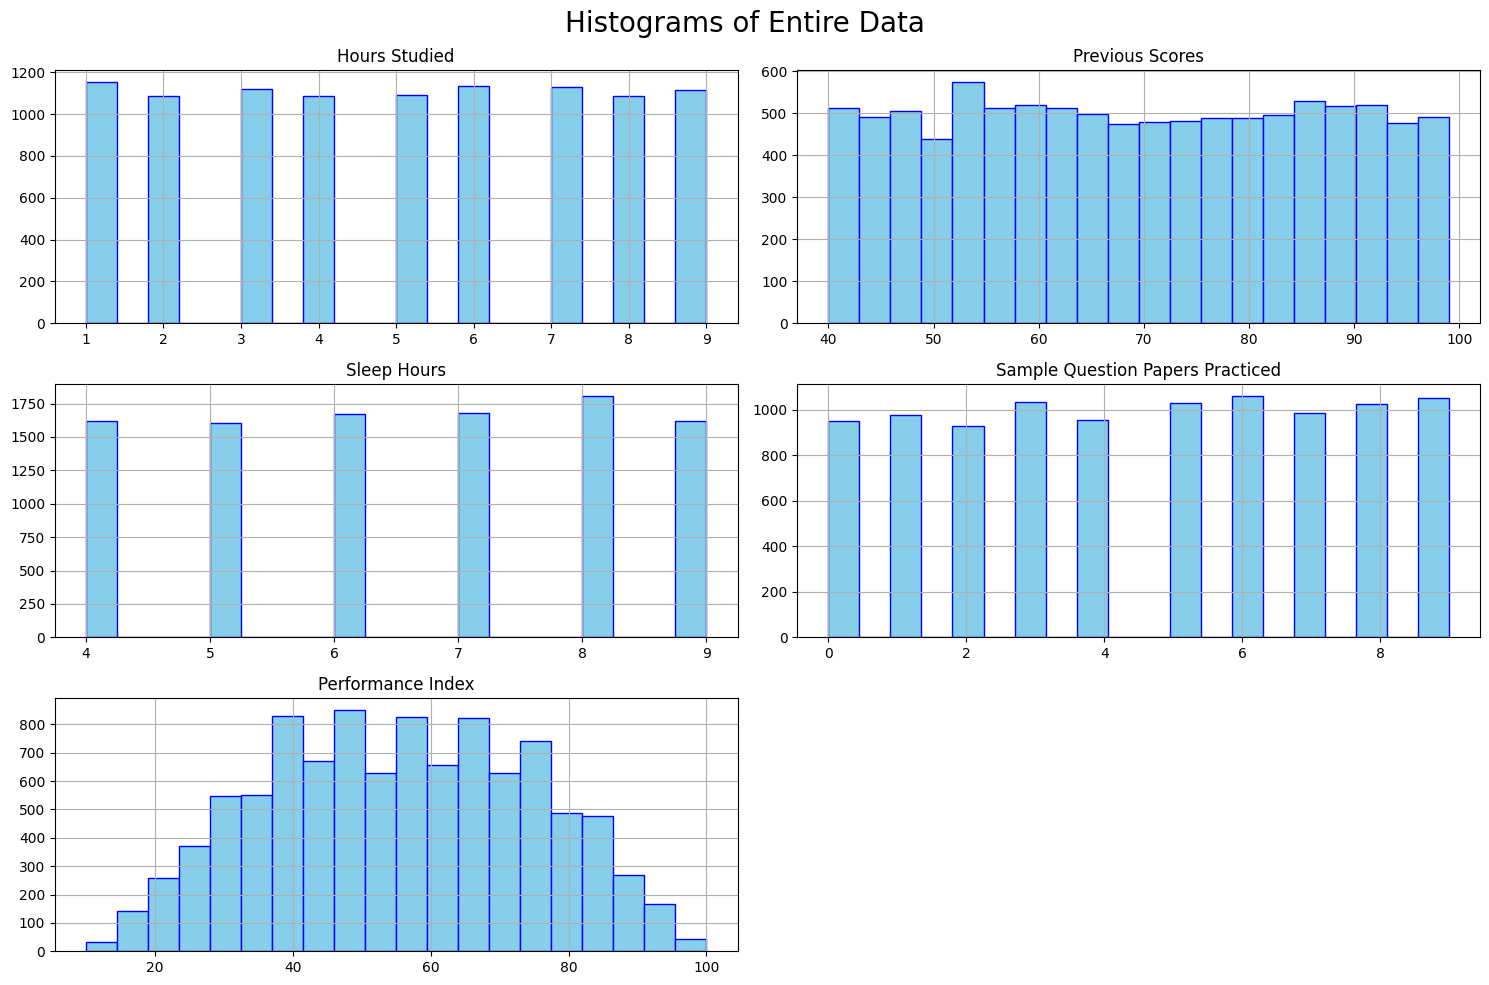

In [8]:
axes = data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='blue')
plt.suptitle('Histograms of Entire Data', fontsize=20)
plt.tight_layout()

# Remove grids from each subplot
for ax in axes.flatten():
    ax.grid(True)

plt.show()

#Label Encoding for Alphabatical Data


In [9]:
le = LabelEncoder()
data['Extracurricular Activities'] = le.fit_transform(data['Extracurricular Activities'])

#Spliting and Labeling Data

In [10]:
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

# Training the Regressor Model


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Calculating Accuracy (R2 Score)

In [12]:
accuracy = model.score(X_test, y_test)
print(f"Model trained! Accuracy : {accuracy:.4f}")

Model trained! Accuracy : 0.9891


# Defining Prediction Function for Gradio

In [13]:
def predict_performance(hours_studied, previous_scores, extra_activities, sleep_hours, sample_papers):

    extra_activities_encoded = 1 if extra_activities == "Yes" else 0

    new_data = [[
        hours_studied,
        previous_scores,
        extra_activities_encoded,
        sleep_hours,
        sample_papers
    ]]

    prediction = model.predict(new_data)

    return round(prediction[0], 2)

# Createing Gradio Interface

In [14]:
inputs = [
    gr.Slider(minimum=1, maximum=9, step=1, label="Hours Studied"),
    gr.Slider(minimum=40, maximum=99, step=1, label="Previous Scores"),
    gr.Radio(["Yes", "No"], label="Extracurricular Activities"),
    gr.Slider(minimum=4, maximum=9, step=1, label="Sleep Hours"),
    gr.Slider(minimum=0, maximum=9, step=1, label="Sample Papers Practiced")
]

output = gr.Number(label="Predicted Performance Index")

app = gr.Interface(
    fn=predict_performance,
    inputs=inputs,
    outputs=output,
    title="Student Performance Predictor",
    description=f"Enter student details to predict their performance index. (Model Accuracy: {accuracy:.2f})"
)

app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://46e1f5e40c5b7c7954.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
